# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

d:\Anaconda2\lib\site-packages\pandas\core\indexing.py:461: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


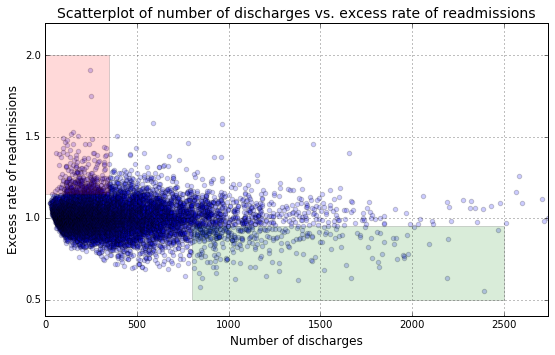

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

Looking at the conclusions above, we may not be able to agree with the analysis above. We may not also subscribe to the recommendations. We don't really see a downward trend in the graph. We observe that the points look almost randomly distributed about an excess rate of admissions of 1. The conclusions pertaining to the red and green areas looks acceptable, but the sample sizes are clearly distorted. There are far more data points for discharges below 1000 then above. This cannot be the basis to draw such inferences.  We also disagree with the discharge intervals chosen. Using less than 100 and greater than 1000 ignores the numerous data points in the middle. It would be much better to use 1000 as the threshold point.

## Preliminary Analysis

In [6]:
clean_hospital_read_df.head(5)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


We observe a lot of NULl values in the data.

In [5]:
clean_hospital_read_df.isnull().sum()

Hospital Name                     0
Provider Number                   0
State                             0
Measure Name                      0
Number of Discharges              0
Footnote                      11497
Excess Readmission Ratio         81
Predicted Readmission Rate       81
Expected Readmission Rate        81
Number of Readmissions           81
Start Date                        0
End Date                          0
dtype: int64

In [8]:
clean_hospital_read_df.dropna(subset=['Excess Readmission Ratio','Predicted Readmission Rate','Number of Readmissions'],
                              inplace=True)

In [9]:
clean_hospital_read_df.isnull().sum()

Hospital Name                     0
Provider Number                   0
State                             0
Measure Name                      0
Number of Discharges              0
Footnote                      11497
Excess Readmission Ratio          0
Predicted Readmission Rate        0
Expected Readmission Rate         0
Number of Readmissions            0
Start Date                        0
End Date                          0
dtype: int64

Now that we have dropped records with NULL rows, we can proceed.

I am starting my analysis by checking the mean as well as  between measures and Readmission ratio of hospitals with larger capacity.

In [8]:
a = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 1000]
a = a.groupby(by='Measure Name')
a = a['Excess Readmission Ratio'].mean()
a.head()

Measure Name
READM-30-AMI-HRRP         0.981768
READM-30-COPD-HRRP        1.027584
READM-30-HF-HRRP          0.997435
READM-30-HIP-KNEE-HRRP    0.919898
READM-30-PN-HRRP          1.016582
Name: Excess Readmission Ratio, dtype: float64

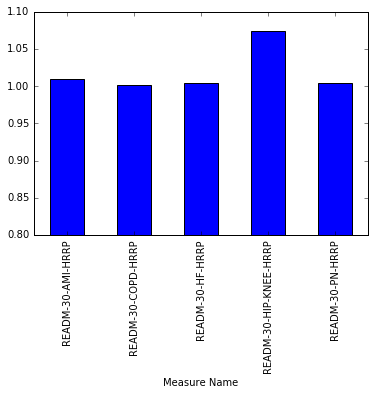

In [13]:
a.plot(kind = 'bar', ylim=[0.8,1.1])

In [14]:
a = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 500]
a =a.groupby(by='Measure Name')
a=a['Excess Readmission Ratio'].mean()
a.head()

Measure Name
READM-30-AMI-HRRP         1.009959
READM-30-COPD-HRRP        1.001140
READM-30-HF-HRRP          1.004773
READM-30-HIP-KNEE-HRRP    1.074558
READM-30-PN-HRRP          1.004257
Name: Excess Readmission Ratio, dtype: float64

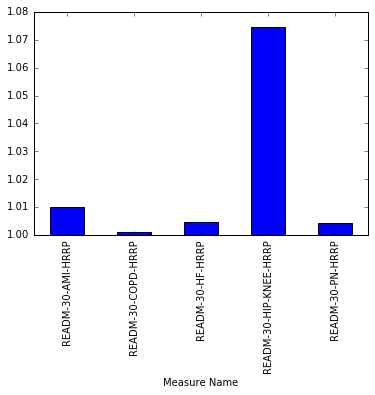

In [16]:
a.plot(kind = 'bar', ylim=[1,1.08])

After checking the above plots as well as the mean computations, we find that patients with the measure-'READM-30-HIP-KNEE-HRRP' could be possibly to be readmitted in a hospital with a smaller capacity than a hospital with a larger capcity. We are considering minimum number of measure records considered here is 800. We coul also recommend that smaller hospitals that deal with 'READM-30-HIP-KNEE-HRRP' whould be provided with more expert staff or made into bigger hospitals.

We are trying to establish that the number of discharges has an impact on the rate of readmissions

For this purpose we will have two distinct groups Let us consider two groups  
1) Hospitals with number of discharges < 500  
2) Hospitals with number of discharges > 1000

Let us define the hypothesis:-
H0: There is no impact. m1 =  m2 
H1: There is a impact => m1 > m2

m1 = mean(hospitals with discharges < 500) 
m2 = mean(hospitals with discharges> 1000)
Where m1 and m2 are the population means

In [18]:
from scipy import stats
hospitals1 = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 500]
hospitals2 = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 1000]
hospitals1_size = len(hospitals1)
hospitals2_size = len(hospitals2)
all_hospitals_size = len(clean_hospital_read_df)
sample_mean_m1 = hospitals1['Excess Readmission Ratio'].mean()
sample_mean_m2 = hospitals2['Excess Readmission Ratio'].mean()
sample_var_m1 = hospitals1['Excess Readmission Ratio'].var()
sample_var_m2 = hospitals2['Excess Readmission Ratio'].var()

print 'Means of both the samples:',sample_mean_m1,sample_mean_m2
print 'Variances of both the samples:',sample_var_m1,sample_var_m2

sample_mean_diff = sample_mean_m1 - sample_mean_m2

# let us now consider a sampling distribution with means of both groups as m1_sample_dist and m2_sample_dist
sample_dist_mean_diff = 0 #(since m1_sample_dist-m2_sample_dist= m1-m2= 0)
sample_dist_var_diff = (sample_var_m1/hospitals1_size) + (sample_var_m2/hospitals2_size)
sample_dist_std_diff = np.sqrt(sample_dist_var_diff)

print 'Mean and Standard deviation of the difference in distributions:',sample_dist_mean_diff,sample_dist_std_diff

# z-score
z_score = (sample_dist_mean_diff - sample_mean_diff) / sample_dist_std_diff
print 'Z-Score =',z_score

# p-Value
p_value = stats.norm.cdf(z_score)
print 'P-Value =',p_value

Means of both the samples: 1.01113108184 0.978335421166
Variances of both the samples: 0.00750381870618 0.0144017648898
Mean and Standard deviation of the difference in distributions: 0 0.00565176342342
Z-Score = -5.80273062023
P-Value = 3.2621782666e-09


Since the p-value is way below our alpha threshold (0.01), we can consider this is as statistically significant. Hence we can reject the NULL hypothesis which means the number of discharges has an impact on the rate of readmissions.